In [1]:
# 查看当前挂载的数据集目录, 该目录下的变更重启环境后会自动还原
# View dataset directory. 
# This directory will be recovered automatically after resetting environment. 
!ls /home/aistudio/data

Advertising.csv


In [0]:
# 查看工作区文件, 该目录下的变更将会持久保存. 请及时清理不必要的文件, 避免加载过慢.
# View personal work directory. 
# All changes under this directory will be kept even after reset. 
# Please clean unnecessary files in time to speed up environment loading. 
!ls /home/aistudio/work

In [ ]:
# 如果需要进行持久化安装, 需要使用持久化路径, 如下方代码示例:
# If a persistence installation is required, 
# you need to use the persistence path as the following: 
!mkdir /home/aistudio/external-librariess'fasfa
!pip install beautifulsoup4 -t /home/aistudio/external-libraries

In [ ]:
# 同时添加如下代码, 这样每次环境(kernel)启动的时候只要运行下方代码即可: 
# Also add the following code, 
# so that every time the environment (kernel) starts, 
# just run the following code: 
import sys 
sys.path.append('/home/aistudio/external-libraries')

请点击[此处](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576)查看本环境基本用法.  <br>
Please click [here ](https://ai.baidu.com/docs#/AIStudio_Project_Notebook/a38e5576) for more detailed instructions. 

简单回归分析的目标是，通过模型来描述某一特征（解释变量x）与连续输出变量（目标变量y）直接关系，</br>
𝑦 = 𝛽₀ + 𝛽₁𝑥₁ + ⋯ + 𝛽ᵣ𝑥ᵣ + 𝜀</br>
![](https://ai-studio-static-online.cdn.bcebos.com/0b8592e03e824bb994a864b34235ddc66ca085f509f442f99f59c2c814df2d49)



# 利用波士顿房价数据做线性回归
知识点：
*  从网上获取数据。
*  数据基本可视化。
*  回归方程的建立。


In [14]:
import pandas as pd
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",header=None,sep='\s+')

In [16]:
df

In [2]:
df.describe()

In [17]:
df.columns=('CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PROATIO','B','LSTAT','MEDV')
df.head()


In [4]:
df.describe()

![](https://ai-studio-static-online.cdn.bcebos.com/541592bee2b245c4af0dd26f3d77720823bb71f8103f43bf82a528a7fa5e4abd)

 

 



# 可视化数据描述
 
探索性数据分析（Exploratory Data Analysis，EDA）是机器学习模型训练之前的一个重要步骤，</br>可以帮助我们直观地发现数据中的异常，数据分布，以及特征间的相互关系。
~~~~
首先借助散点图，可视化显示不同特征两两关系
使用包seaborn-pairplot

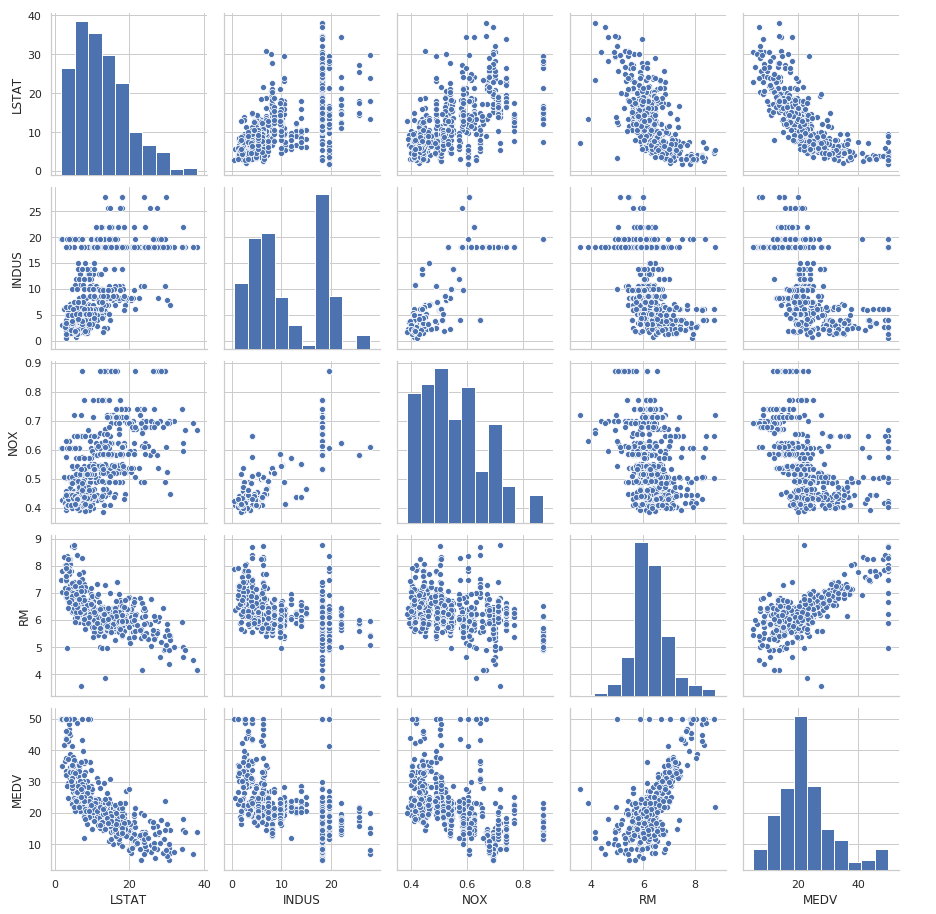

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
cols=['LSTAT','INDUS','NOX','RM','MEDV']
sns.pairplot(df[cols],height=2.5)

通过观察发现，RM（平均每居民数）和房价（MedV）存在线性相关，同时MEDV看起来显示正态分布，但存在异常点。

# 相关系数矩阵
为了量化特征间关系，构建相关系数矩阵。
相关系数矩阵包含皮尔逊积矩相关系数（Pearson product-moment correlation coffiient）。</br>
定义：两个变量之间的皮尔逊相关系数定义为两个变量之间的协方差和标准差的商：</br>
![](https://ai-studio-static-online.cdn.bcebos.com/19ecf600cb0b4b63ab12b501cb5e5b2662ccf33565a945d5afa71fede5014b34)


In [7]:
import numpy as np 
df2=df[cols].values.T#T 行列转置
cm=np.corrcoef(df2)#调用np相关矩阵函数
cm


array([[ 1.        ,  0.60379972,  0.59087892, -0.61380827, -0.73766273],
       [ 0.60379972,  1.        ,  0.76365145, -0.39167585, -0.48372516],
       [ 0.59087892,  0.76365145,  1.        , -0.30218819, -0.42732077],
       [-0.61380827, -0.39167585, -0.30218819,  1.        ,  0.69535995],
       [-0.73766273, -0.48372516, -0.42732077,  0.69535995,  1.        ]])

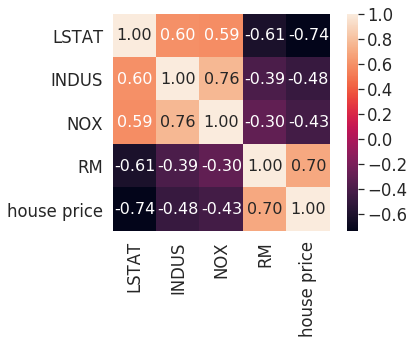

In [13]:
sns.set(font_scale=1.5)
cols=['LSTAT','INDUS','NOX','RM','house price']
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':16},yticklabels=cols,xticklabels=cols)

In [6]:
df[cols].values.T

array([[ 4.98 ,  9.14 ,  4.03 , ...,  5.64 ,  6.48 ,  7.88 ],
       [ 2.31 ,  7.07 ,  7.07 , ..., 11.93 , 11.93 , 11.93 ],
       [ 0.538,  0.469,  0.469, ...,  0.573,  0.573,  0.573],
       [ 6.575,  6.421,  7.185, ...,  6.976,  6.794,  6.03 ],
       [24.   , 21.6  , 34.7  , ..., 23.9  , 22.   , 11.9  ]])

In [10]:
df[cols].values.T

array([[ 4.98 ,  9.14 ,  4.03 , ...,  5.64 ,  6.48 ,  7.88 ],
       [ 2.31 ,  7.07 ,  7.07 , ..., 11.93 , 11.93 , 11.93 ],
       [ 0.538,  0.469,  0.469, ...,  0.573,  0.573,  0.573],
       [ 6.575,  6.421,  7.185, ...,  6.976,  6.794,  6.03 ],
       [24.   , 21.6  , 34.7  , ..., 23.9  , 22.   , 11.9  ]])

# 使用scikit-learn实现回归模型
[scikit-learn](https://scikit-learn.org/stable/)
https://www.bilibili.com/video/BV1xW411Y7Qd?from=search&seid=13093182737190055333

In [70]:
from sklearn.linear_model import LinearRegression

X1=df[['LSTAT']].values#定义自变量
X2=df[['RM']].values#定义自变量
y=df[['MEDV']].values#定义因变量
X
y


In [68]:
slr1=LinearRegression()#建立模型
 
slr2=LinearRegression()#建立模型

In [76]:
slr1.fit(X1,y)#拟合模型
slr2.fit(X2,y)#拟合模型
y1_pred=slr1.predict(X1)#计算通过模型，预测y_pred，与实际的y进行对比
y2_pred=slr2.predict(X2)#计算通过模型，预测y_pred，与实际的y进行对比
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y1_pred,y))#预测值与实际值进行对比MSE
print(mean_squared_error(y2_pred,y))#预测值与实际值进行对比MSE
from sklearn.metrics import r2_score
print(r2_score(y,y1_pred))
print(r2_score(y,y2_pred))

38.48296722989415
43.60055177116956
0.5441462975864797
0.48352545599133423


In [52]:
x1=new_x = np.array(5).reshape(1, -1)#单个值变为二维数组
 
#print(x1.shape)
y=slr.predict(x1)

In [55]:
y[1:1]

array([], shape=(0, 1), dtype=float64)

In [28]:
print("斜率：")
print(slr.coef_[0])
print("截距:")
print(slr.intercept_)

斜率：
[-0.95004935]
截距:
[34.55384088]


MEDV=-0.95* LSTA+34.55

In [33]:
X

绘制回归线

In [34]:
def lin_regplot(X,y,model):
    plt.scatter(X,y,c='blue')
    plt.plot(X,model.predict(X),color='red')
    return None

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


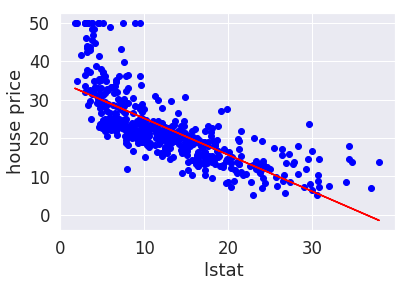

In [37]:
lin_regplot(X,y,slr)
 
plt.xlabel("lstat ")
plt.ylabel("house price")
plt.show()

# 模型的评估
模型建立

In [59]:
from sklearn.model_selection import train_test_split#分类用的比较多
#rain_test_split函数用于将矩阵随机划分为训练子集和测试子集，并返回划分好的训练集测试集样本和训练集测试集标签。
X=df.iloc[:, :-1].values
y=df['MEDV'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)


In [60]:
print(len(X_train))

print(len(X_test))

354
152


In [75]:
from sklearn.linear_model import LinearRegression
slr=LinearRegression()
slr.fit(X_train,y_train)
#基于测试数据得到预测值
y_train_pred=slr.predict(X_train)
y_test_pred=slr.predict(X_test)


0.5441462975864797
0.48352545599133423


## 残差检验
残差在数理统计中是指实际观察值与估计值（拟合值）之间的差。“残差”蕴含了有关模型基本假设的重要信息。如果回归模型正确的话， 我们可以将残差看作误差的观测值。
~~~~
简单来说即将预测结果减去对应目标变量真实值，就可以获得残差值。


(-10, 50)

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


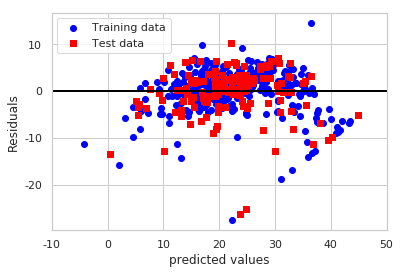

In [14]:
import matplotlib.pyplot as plt
plt.scatter(y_train_pred,y_train_pred-y_train,c='blue',marker='o',label='Training data')
plt.scatter(y_test_pred,y_test_pred-y_test,c='red',marker='s',label='Test data')
plt.xlabel("predicted values")
plt.ylabel("Residuals")
plt.legend(loc='upper left')
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='black')
plt.xlim([-10,50])

最好的情况下，残差为0，残差图像在x=0两边均匀分布，如果出现显著规律，意味着模型遗漏了某些能够影响残差的解释信息。

# 均方误差（Mean Squared Error，MSE）
均方误差（MSE）是各数据偏离真实值 差值的平方和 的平均数
MSE越小，模型越好

In [25]:
from sklearn.metrics import mean_squared_error
print("训练集MSE")
print(mean_squared_error(y_train,y_train_pred))
print("测试集合MSE")
print(mean_squared_error(y_test,y_test_pred))

训练集MSE
19.958219814238046
测试集合MSE
27.195965766883354


## 决定系数 
R2 决定系数可以更好地解释模型性能。


In [15]:
from sklearn.metrics import r2_score
print ("训练集决定系数")
print(r2_score(y_train,y_train_pred))
print("测试集决定系数")
print(r2_score(y_test,y_test_pred))

训练集决定系数
0.7645451026942549
测试集决定系数
0.6733825506400177


# 多项式回归
 ** 并不是所有的回归问题都可以通过简单线性回归解决，想法现实问题中，多项式回归更有适用性。**
曲线回归分析最困难和收益的工作是确定因变量y和自变量x之间曲线关系的类型。通常通过两个途径来确定：
1. 利用有关专业知识，根据已知道的理论规律和实践经验，例如幂函数的形式能较好地表现生产函数，多项式方程能较好地反映总成本与产量之间的关系等。
1. 若没有已知道的理论规律和经验可用，可作散点图，观察点分布趋势与哪一类函数最相近，然后再选该函数来拟合数据。

对于可直线化的曲线函数类型，曲线回归分析的基本过程是：先将x和y进行变量转换，然后对新变量进行直线回归分析-建立直线回归方程并进行显著性检验，最后将新变量还原为原变量，由新变量的直线回归方程得出原变量的曲线回归方程。

还有一种情况是找不到已知道的函数曲线较接近数据的分布趋势，此时可以利用多项式回归，通过逐渐增加多项式的高次项来拟合，直到满意为止。

可以使用sklearn 中Polynomianl Features转化来实现对一元回归的转化问题

In [66]:
from sklearn.linear_model import LinearRegression
X=df[['LSTAT']].values#弱势群体所占比例
y=df[['MEDV']].values
regr=LinearRegression()

#一元线性回归
liner1=regr.fit(X,y)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("一元回归的MSE")
y_pred=liner1.predict(X)
print(mean_squared_error(y,y_pred))
print("一元回归的决定系数")
print(r2_score(y,y_pred))

一元回归的MSE
38.48296722989415
一元回归的决定系数
0.5441462975864797


In [5]:
from sklearn.preprocessing import PolynomialFeatures
quadratic=PolynomialFeatures(degree=2)
cubic=PolynomialFeatures(degree=3)
x_2=quadratic.fit_transform(X)
x_3=cubic.fit_transform(X)

In [65]:
import numpy as np
X_fit=np.arange(X.min(),X.max(),1)[:,np.newaxis]
X_fit

array([[ 1.73],
       [ 2.73],
       [ 3.73],
       [ 4.73],
       [ 5.73],
       [ 6.73],
       [ 7.73],
       [ 8.73],
       [ 9.73],
       [10.73],
       [11.73],
       [12.73],
       [13.73],
       [14.73],
       [15.73],
       [16.73],
       [17.73],
       [18.73],
       [19.73],
       [20.73],
       [21.73],
       [22.73],
       [23.73],
       [24.73],
       [25.73],
       [26.73],
       [27.73],
       [28.73],
       [29.73],
       [30.73],
       [31.73],
       [32.73],
       [33.73],
       [34.73],
       [35.73],
       [36.73],
       [37.73]])

506

In [36]:
 #二元回归
liner2=regr.fit(x_2,y)
print("二元回归的MSE")
y_pred2=liner2.predict(quadratic.fit_transform(X))
print(mean_squared_error(y,y_pred2))
print("二元回归的决定系数")
print(r2_score(y,y_pred2))

二元回归的MSE
30.330520075853713
二元回归的决定系数
0.6407168971636612


In [ ]:
 #三元回归
liner3=regr.fit(x_3,y)
print("三元回归的MSE")
y_pred3=liner3.predict(cubic.fit_transform(X_fit))
print(mean_squared_error(y,y_pred3))
print("三元回归的决定系数")
print(r2_score(y,y_pred3))

In [60]:
len(y_pred2)

506

作图对比多元回归拟合效果

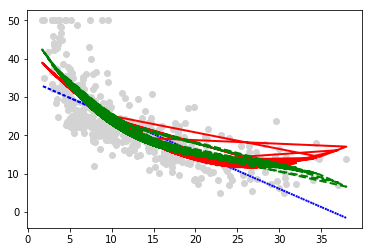

In [61]:
import matplotlib.pyplot as plt
plt.scatter(X,y,label="training points",color="lightgray")
plt.plot(X,y_pred,color="blue",linestyle=":",lw=2)
plt.plot(X,y_pred2,color="red",lw=2,linestyle="-")
plt.plot(X,y_pred3,color="green",lw=2,linestyle="--")
plt.show()

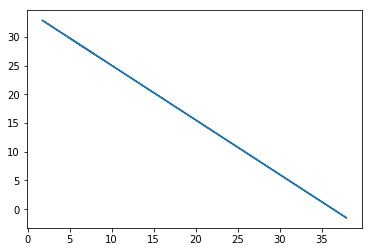

1.复习回归的基本步骤：（1）数据获取，（2）数据观察，（3）训练集、测试集划分，（4）模型构建，（5）模型评估。
2.多元回归与一元回归的区别。
# 广告销售数据
标签值（sales）：

* Sales：对应产品的销量
* 特征值（TV，Radio，Newspaper）：

TV：对于一个给定市场中单一产品，用于电视上的广告费用（以千为单位）
* Radio：在广播媒体上投资的广告费用
* Newspaper：用于报纸媒体的广告费用
在这个案例中，通过不同的广告投入，预测产品销量。因为响应变量是一个连续的值，所以这个问题是一个回归问题。数据集一共有200个观测值，每一组观测对应一个市场的情况。接下里对数据进行描述性统计，以及寻找缺失值（缺失值对模型的影响较大，如发现缺失值应替换或删除）,且利用箱图来从可视化方面来查看数据集，在描述统计之后对数据进行相关性分析，以此来查找数据中特征值与标签值之间的关系。
 

In [4]:
import pandas as pd
adv_data=pd.read_csv("/home/aistudio/data/Advertising.csv")
adv_data=adv_data.iloc[:,1:]

In [5]:
print(adv_data.describe())
print(adv_data[adv_data.isnull()==True].count())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


In [ ]:
### 数据可视化描述

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


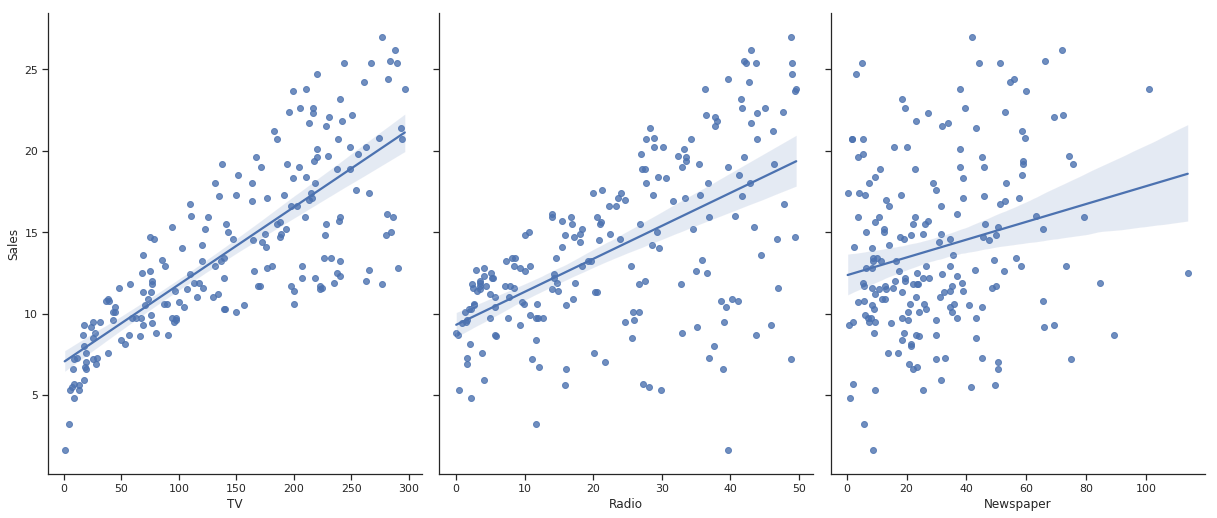

In [9]:
import seaborn as sns
sns.set(style="ticks")
from matplotlib import pyplot as plt
sns.pairplot(adv_data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.8,kind = 'reg')
plt.show()


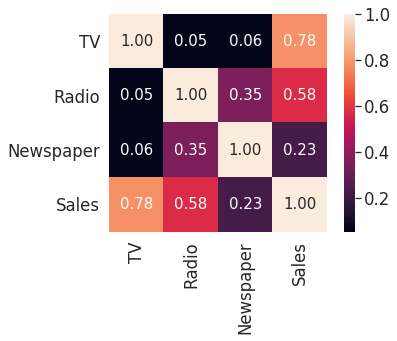

In [8]:
import numpy as np
cols=["TV","Radio","Newspaper","Sales"]
cm=np.corrcoef(adv_data[:].values.T)#T 行列转置
cm
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols,xticklabels=cols)

### 测试集与训练集的划分


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(adv_data.iloc[:,:3],adv_data.Sales,train_size=.80)
print("训练集有：",len(X_train))
print("测试集有",len(X_test))

训练集有： 160
测试集有 40


### 模型训练

In [11]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
a=model.intercept_
b=model.coef_

print("截距",a,",回归系数：",b)

截距 2.921774007041197 ,回归系数： [ 0.04598747  0.18660365 -0.00378399]


## 模型的评价
通过决定系数R2来判断拟合程度

In [21]:
 
from sklearn.metrics import r2_score
score = model.score(X_test,Y_test)
print(score)
Y_pred =model.predict(X_test)
r2_score(Y_test,Y_pred )#两种计算R2的方法:model.score,r2_score()

0.928865183011783


0.9288651830117831

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


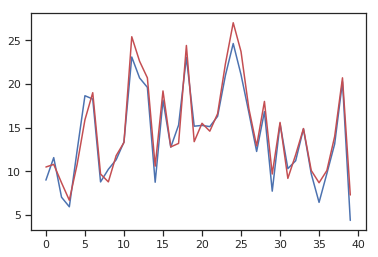

In [23]:
 
plt.plot(range(len(Y_pred)),Y_pred,'b',label="predict")
#显示预测图像
plt.plot(range(len(Y_test)),Y_test,'r',label="true")
 

# 数据预处理
特征缩放
我们可以观察到X的值之间相差比较大，为了能够得到更好的分类效果，我们采用特征缩放对数据进行处理。这里用到的是MinMaxScaler，特征缩放的其他方式。

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
adv_data_std= pd.DataFrame(scaler.fit_transform(adv_data))
adv_data_std

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)
X_combined_std=sc.transform(X)
y_combined=y

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(adv_data_std.iloc[:,:3],adv_data.Sales,train_size=.80)
print("训练集有：",len(X_train))
print("测试集有",len(X_test))

训练集有： 160
测试集有 40


In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,Y_train)
a=model.intercept_
b=model.coef_

print("截距",a,",回归系数：",b)

截距 3.176918718170324 ,回归系数： [13.38786958  9.29056333 -0.46221539]


In [15]:
from sklearn.metrics import r2_score
score1 = model.score(X_test,Y_test)

print(score1)

Y_pred =model.predict(X_test)

r2_score(Y_test,Y_pred )#两种计算R2的方法:model.score,r2_score()

0.8987922088183515
0.8960597750935981


0.8987922088183515

## 多元线性回归

In [4]:
! ls /home/aistudio/work

价值观与价值选择.xlsx


In [19]:
import pandas as pd
import numpy as np
df=pd.read_excel("/home/aistudio/work/价值观与价值选择.xlsx")


In [20]:
df["y"]=df.apply(lambda row: np.average(row[:]),axis=1 )
df.head()

,富强,民主,文明,和谐,自由,平等,公正,法治,爱国,敬业,诚信,友善,y
0,5,5,5,5,5,5,5,5,5,5,5,5,5.000000
1,5,5,5,5,5,5,5,5,5,5,5,5,5.000000
2,5,5,5,5,4,5,5,5,5,5,5,5,4.916667
3,4,4,4,4,3,4,4,4,4,4,4,4,3.916667
4,5,5,5,4,4,4,4,5,5,5,5,5,4.666667


In [30]:
from sklearn.linear_model import LinearRegression 
slr=LinearRegression()
X=df.iloc[:,0:12]
y=df['y']
slr.fit(X,y)
slr.intercept_
slr.coef_

array([0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333, 0.08333333, 0.08333333, 0.08333333,
       0.08333333, 0.08333333])

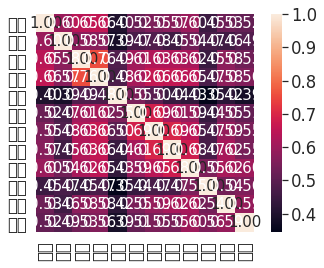

In [10]:
import seaborn as sns
import numpy as np

cm=np.corrcoef(df[:].values.T)#T 行列转置
cm
sns.set(font_scale=1.5)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=df.columns,xticklabels=df.columns)